# DS-7331 Machine Learning Project 3
## Airbnb Clustering Tasks
### Allen Miller, Ana Glaser, Jake Harrison, Lola Awodipe

https://nbviewer.jupyter.org/github/allenmiller17/SMU_7331_ML1_Projects/blob/main/Project_2_Final_Team.ipynb

## Introduction

Our project utilizes Airbnb data from kaggle.com.

The main objective of this project is to perform cluster analyses to simply and potentially create more efficient classification models than the previous project.

### Table of Contents
0. Libraries and Loading Data
<br>
1. Business Understanding
    <br>
2. Data Understanding
    <br>
    2.1 Data Meaning
    <br>
    2.2 Data Quality
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2.1 Missing Values
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2.2 Outliers
    <br>
3. Modeling and Evaluation
    <br>
    3.1 KMeans Clustering Analysis
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1.1 Selecting Optimal K-Clusters Value
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1.2 Internal And External Validation Measures
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1.3 Results
        <br>
    3.2 Hierichial Clustering Analysis
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2.1 Selecting Optimal Clusters
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2.2 Validation Measures
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2.3 Results
        <br>
     3.3 DBScan Clustering Analysis
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.3.1 Selecting Optimal Clusters
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.3.2 Validation Measures
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.3.3 Results
        <br>
     3.4 Comparison of all Clustering Techniques
     <br>
4. Deployment
<br>
5. Exceptional Work - Applying cluster analyses to Classification Models?

### 0. Libraries and Loading Data

In [101]:
#loading libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

from sklearn import metrics as mt

from sklearn.cluster import KMeans

In [ ]:
#restart button
pdata = pd.read_csv("airbnb1.csv")
pdata['price'] = np.exp(pdata.log_price)
pdata = pdata.dropna()

#transforming the property type to a binary classification
value_list = ["Apartment","House","Condominium","Townhouse","Loft"]
boolean_series = ~pdata.property_type.isin(value_list)
filtered_df = pdata[boolean_series]

filtered_df.head(100)

for i in list (filtered_df.index):
    pdata.loc[i,'property_type'] = "other"

#transforming the longitude and latitude variables to East / West
pdata["region"] = pd.cut(pdata.longitude,[-200,-100,0],2,labels=["West","East"])

pdata_all=pdata.copy()

#Encoding boolean and categorical variables
replaceStruct = {
                "cleaning_fee":     {True: 1, False: 0},
                "instant_bookable":     {"t": 1, "f": 0},
                "host_identity_verified":     {"t": 1, "f": 0},
                "property_type":     {"Apartment": 0,"House": 1,"Condominium": 2,"Townhouse": 3,"Loft": 4, "other": 5},
                "region": {"East": 0, "West": 1},
                "room_type": {"Entire home/apt": 0, "Private room": 1, "Shared room": 2},
                "bed_type": {"Real Bed": 0, "Futon": 1, "Pull-out Sofa": 2, "Couch": 3, "Airbed": 4},
                "city": {"NYC": 0, "SF": 1, "DC": 2, "LA": 3, "Chicago": 4, "Boston": 5},
                "cancellation_policy": {"strict": 0, "moderate": 1, "flexible": 2, "super_strict_30": 3, "super_strict_60": 4}
                    }

pdata=pdata.replace(replaceStruct)
pdata_cls=pdata.copy()
pdata_list = pdata_all.copy()
pdata_list.drop(['accommodates','bathrooms','bedrooms','beds','description','log_price','host_response_rate','first_review','host_since','last_review','zipcode','id','neighbourhood','host_has_profile_pic','cleaning_fee','instant_bookable','host_identity_verified','property_type','room_type','bed_type','cancellation_policy','city','region','longitude','latitude'], axis=1, inplace=True)


pdata.drop(['description','host_response_rate','first_review','host_since','last_review','zipcode','id','neighbourhood','host_has_profile_pic','cleaning_fee','instant_bookable','host_identity_verified','property_type','room_type','bed_type','cancellation_policy','city','region','longitude','latitude'], axis=1, inplace=True)

from scipy.stats import zscore

pdata_z = pdata.apply(zscore)





In [2]:
pdata = pd.read_csv("airbnb1.csv")

In [3]:
pdata.head()

id  log_price property_type        room_type  accommodates  \
0   6901257   5.010635     Apartment  Entire home/apt             3   
1   6304928   5.129899     Apartment  Entire home/apt             7   
2   7919400   4.976734     Apartment  Entire home/apt             5   
3  13418779   6.620073         House  Entire home/apt             4   
4   3808709   4.744932     Apartment  Entire home/apt             2   

   bathrooms  bed_type cancellation_policy  cleaning_fee city  ...  \
0        1.0  Real Bed              strict          True  NYC  ...   
1        1.0  Real Bed              strict          True  NYC  ...   
2        1.0  Real Bed            moderate          True  NYC  ...   
3        1.0  Real Bed            flexible          True   SF  ...   
4        1.0  Real Bed            moderate          True   DC  ...   

  instant_bookable last_review   latitude   longitude     neighbourhood  \
0                f   7/18/2016  40.696524  -73.991617  Brooklyn Heights   
1                t   9/23/2017  40.766115  -73.989040    Hell's Kitchen   
2                t   9/14/2017  40.808110  -73.943756            Harlem   
3                f         NaN  37.772004 -122.431619      Lower Haight   
4                t   1/22/2017  38.925627  -77.034596  Columbia Heights   

  number_of_reviews review_scores_rating zipcode  bedrooms  beds  
0                 2                100.0   11201       1.0   1.0  
1                 6                 93.0   10019       3.0   3.0  
2                10                 92.0   10027       1.0   3.0  
3                 0                  NaN   94117       2.0   2.0  
4                 4                 40.0   20009       0.0   1.0  

[5 rows x 26 columns]

### 1. Business Understanding

For our project, we decided to use AirBnb data from six major cities in the United States from kaggle.com. Our objective is to classify the type of property based on the data attributes like city, number of reviews, bathrooms, bedrooms and number of people it accommodates. 

First we will evaluate the various clustering techniques by visually inspecting the separation and interpretability of the clustering models. We will also compare the effectiveness of our clusters by evaluating the sillhouette score and the inertia value for each technique.  

Then we will append the clusters to the dataset as a feature to determine if the classification task is improved by these regressors.

To assess the effectiveness of our classification, we will look at the accuracy, precision, recall and evaluate the confusion matrix results.






### 2. Data Understanding


The number of reviews feature showed data that was heavily skewed to the left.  Because normality is not an assumption for clustering and classification tasks, we weren't worried about having a normal distribution for our feature observations, so we chose not to transform any of these variables.

The attribute of neighborhood made our data very sparse and it increased run time dramatically, when we tested the models with and without it, the difference was negligible, so the cost benefit of run time vs model performance seemed like a fair trade-off.

#### 2.1 Data Meaning

In [4]:
pdata['price'] = np.exp(pdata.log_price)

Adding the price will give our team an idea on how dispersed our data really is, and can easily display if we have any outliers within this dataset.

In [5]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30739 entries, 0 to 30738
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      30739 non-null  int64  
 1   log_price               30739 non-null  float64
 2   property_type           30739 non-null  object 
 3   room_type               30739 non-null  object 
 4   accommodates            30739 non-null  int64  
 5   bathrooms               30645 non-null  float64
 6   bed_type                30739 non-null  object 
 7   cancellation_policy     30739 non-null  object 
 8   cleaning_fee            30739 non-null  bool   
 9   city                    30739 non-null  object 
 10  description             30739 non-null  object 
 11  first_review            24150 non-null  object 
 12  host_has_profile_pic    30648 non-null  object 
 13  host_identity_verified  30648 non-null  object 
 14  host_response_rate      23119 non-null

In [6]:
pdata.skew()

id                     -0.259226
log_price               0.495235
accommodates            2.268456
bathrooms               3.705828
cleaning_fee           -1.047660
latitude               -0.537375
longitude              -0.404738
number_of_reviews       3.773445
review_scores_rating   -3.401681
bedrooms                1.995101
beds                    3.416529
price                   4.240231
dtype: float64

#### 2.2 Data Quality

##### 2.2.1 Missing Values

Given the volume of our data, we were able to reduce incomplete records with missing values and still retain a significant amount of records to evaluate.

In [7]:
pdata = pdata.dropna()

##### 2.2.2 Outliers


We also evaluated the number of unique values found in the categorical variables, we decided to eliminate the neighborhood attribute since it had 590 distinct values.  This made the model run time very slow and only gained a modest amount of accuracy.

In [8]:
pdata.nunique()

id                        17797
log_price                   519
property_type                29
room_type                     3
accommodates                 16
bathrooms                    15
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               17736
first_review               2156
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           71
host_since                 2776
instant_bookable              2
last_review                 861
latitude                  17794
longitude                 17790
neighbourhood               534
number_of_reviews           313
review_scores_rating         44
zipcode                     521
bedrooms                     10
beds                         16
price                       519
dtype: int64

The property type was a very skewed attribute, so we reduced it to the top 5 property types and the rest were labeled as other.

We proceeded to encode the categorical variables that we were going to reserve for our classification models, and transformed the longitude variable to a region called east and west.

We then dropped all of the other columns that would not be used in the proceeding models, like property descriptions, and those that resulted lacking in predictive power, as demonstrated in our previous experiments.


In [9]:
#transforming the property type to a binary classification
value_list = ["Apartment","House","Condominium","Townhouse","Loft"]
boolean_series = ~pdata.property_type.isin(value_list)
filtered_df = pdata[boolean_series]

filtered_df.head(100)

for i in list (filtered_df.index):
    pdata.loc[i,'property_type'] = "other"

#transforming the longitude and latitude variables to East / West
pdata["region"] = pd.cut(pdata.longitude,[-200,-100,0],2,labels=["West","East"])

pdata_all=pdata.copy()

In [10]:
#evaluating the data after transformation
pdata.head()

id  log_price property_type        room_type  accommodates  \
1   6304928   5.129899     Apartment  Entire home/apt             7   
2   7919400   4.976734     Apartment  Entire home/apt             5   
4   3808709   4.744932     Apartment  Entire home/apt             2   
5  12422935   4.442651     Apartment     Private room             2   
7  13971273   4.787492   Condominium  Entire home/apt             2   

   bathrooms  bed_type cancellation_policy  cleaning_fee city  ...   latitude  \
1        1.0  Real Bed              strict          True  NYC  ...  40.766115   
2        1.0  Real Bed            moderate          True  NYC  ...  40.808110   
4        1.0  Real Bed            moderate          True   DC  ...  38.925627   
5        1.0  Real Bed              strict          True   SF  ...  37.753164   
7        1.0  Real Bed            moderate          True   LA  ...  34.046737   

    longitude     neighbourhood number_of_reviews review_scores_rating  \
1  -73.989040    Hell's Kitchen                 6                 93.0   
2  -73.943756            Harlem                10                 92.0   
4  -77.034596  Columbia Heights                 4                 40.0   
5 -122.429526        Noe Valley                 3                100.0   
7 -118.260439          Downtown                 9                 93.0   

  zipcode bedrooms beds  price  region  
1   10019      3.0  3.0  169.0    East  
2   10027      1.0  3.0  145.0    East  
4   20009      0.0  1.0  115.0    East  
5   94131      1.0  1.0   85.0    West  
7   90015      1.0  1.0  120.0    West  

[5 rows x 28 columns]

In [11]:
#Encoding boolean and categorical variables
replaceStruct = {
                "cleaning_fee":     {True: 1, False: 0},
                "instant_bookable":     {"t": 1, "f": 0},
                "host_identity_verified":     {"t": 1, "f": 0},
                "property_type":     {"Apartment": 0,"House": 1,"Condominium": 2,"Townhouse": 3,"Loft": 4, "other": 5},
                "region": {"East": 0, "West": 1},
                "room_type": {"Entire home/apt": 0, "Private room": 1, "Shared room": 2},
                "bed_type": {"Real Bed": 0, "Futon": 1, "Pull-out Sofa": 2, "Couch": 3, "Airbed": 4},
                "city": {"NYC": 0, "SF": 1, "DC": 2, "LA": 3, "Chicago": 4, "Boston": 5},
                "cancellation_policy": {"strict": 0, "moderate": 1, "flexible": 2, "super_strict_30": 3, "super_strict_60": 4}
                    }

pdata=pdata.replace(replaceStruct)
pdata_cls=pdata.copy()


In [12]:
pdata.drop(['description','host_response_rate','first_review','host_since','last_review','zipcode','id','neighbourhood','host_has_profile_pic','cleaning_fee','instant_bookable','host_identity_verified','property_type','room_type','bed_type','cancellation_policy','city','region','longitude','latitude'], axis=1, inplace=True)


In [13]:
#pdata.drop(['longitude','latitude'], axis=1, inplace=True)

In [14]:
pdata.head()

log_price  accommodates  bathrooms  number_of_reviews  \
1   5.129899             7        1.0                  6   
2   4.976734             5        1.0                 10   
4   4.744932             2        1.0                  4   
5   4.442651             2        1.0                  3   
7   4.787492             2        1.0                  9   

   review_scores_rating  bedrooms  beds  price  
1                  93.0       3.0   3.0  169.0  
2                  92.0       1.0   3.0  145.0  
4                  40.0       0.0   1.0  115.0  
5                 100.0       1.0   1.0   85.0  
7                  93.0       1.0   1.0  120.0

In [15]:
pdata_all.head()
pdata_list = pdata_all.copy()
pdata_list.drop(['accommodates','bathrooms','bedrooms','beds','description','log_price','host_response_rate','first_review','host_since','last_review','zipcode','id','neighbourhood','host_has_profile_pic','cleaning_fee','instant_bookable','host_identity_verified','property_type','room_type','bed_type','cancellation_policy','city','region','longitude','latitude'], axis=1, inplace=True)


In [16]:
pdata.nunique()

log_price               519
accommodates             16
bathrooms                15
number_of_reviews       313
review_scores_rating     44
bedrooms                 10
beds                     16
price                   519
dtype: int64

### 3. Model and Evaluation

#### 3.1 K-Means Clustering Analysis

##### 3.1.1 Selecting Optimal K-Clusters

There is room for intrepetation on which k is the best option. The elbow method is difficult to apply in this instance because there is not a specific point that the elbow starts. One could argue the elbow begins at 3, 6, 9, or 11. Due to that, our team decided to refer to the yellowbrick package. This package, when used properly, will select an optimal k value based on the distortion score.

In [17]:
#Scale the data and deploy model

from scipy.stats import zscore

pdata_z = pdata.apply(zscore)

Text(0.5, 1.0, 'K Optimization Graph')

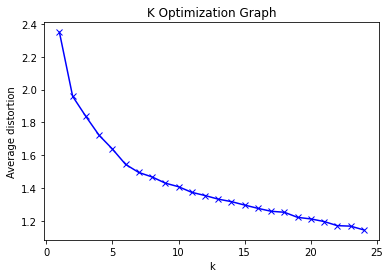

In [18]:
#https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

from scipy.spatial.distance import cdist
clusters=range(1,25)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k, algorithm='auto',init='k-means++',n_jobs=20, random_state=2345)
    model.fit(pdata_z)
    prediction=model.predict(pdata_z)
    meanDistortions.append(sum(np.min(cdist(pdata_z, model.cluster_centers_, 'euclidean'), axis=1)) / pdata_z
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('K Optimization Graph')

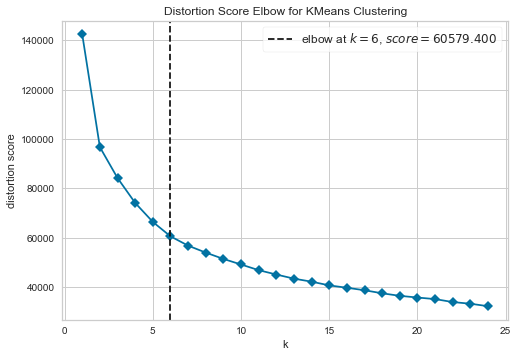

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

In [19]:
#https://towardsdatascience.com/selecting-optimal-k-for-k-means-clustering-c7579fd2e926

from yellowbrick.cluster.elbow import kelbow_visualizer

kelbow_visualizer(model, pdata_z,k=(1,25),timings=False)

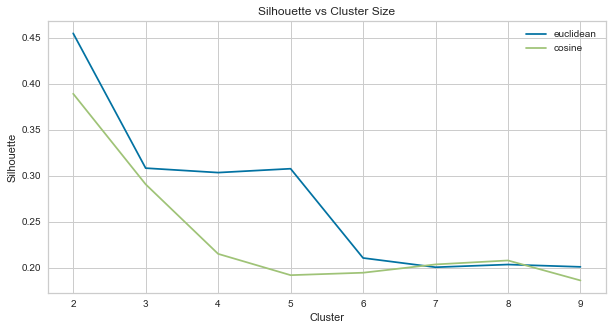

In [21]:
# referenced from class example
from sklearn import metrics
from sklearn.cluster import KMeans

seuclid = []
scosine = []
k = range(2,10)
for i in k:
    kmeans_model = KMeans(n_clusters=i, init="k-means++", random_state=2345).fit(pdata_z)
    labels = kmeans_model.labels_
    seuclid.append(metrics.silhouette_score(pdata_z, labels, metric='euclidean'))
    scosine.append(metrics.silhouette_score(pdata_z, labels, metric='cosine'))
    
plt.figure(figsize=(10,5))
plt.plot(k,seuclid,label='euclidean')
plt.plot(k,scosine,label='cosine')
plt.ylabel("Silhouette")
plt.xlabel("Cluster")
plt.title("Silhouette vs Cluster Size")
plt.legend()
plt.show()

Utilizing this function in determining the optimal k clusters to use, we will move forward with 6 clusters.

In [22]:
KNNModel = KMeans(n_clusters=5, n_init = 3, random_state=2345)
KNNModel.fit(pdata_z)
prediction=KNNModel.predict(pdata_z)


In [23]:
pdata['KCLUSTER']=prediction
pdata_all['KCLUSTER']=prediction
pdata_cls['KCLUSTER']=prediction
pdata_list['KCLUSTER']=prediction

In [24]:
#Assess the distribution of clusters formed
pdata['KCLUSTER'].value_counts()  

3    10344
0     3605
4     1653
2     1296
1      899
Name: KCLUSTER, dtype: int64

In [ ]:
pdata_z.info()

In [ ]:
pdata_z.head()

In [ ]:
pdata_z.nunique()

Intercluster distance displays an embedded cluster centers in a two-dimensions with the distance to the centers preserved. The centers are stochastically updated, therefore updates the centroid after each assignment. The cluster bubbles are sized by the number of instances within those groups. 

  **mds**: multidimensional scaling
  **tsne**: stochastic neighbor embedding
  
When comparing the two methods of evaluating the centroids, the stochastic neighbor, tsne, is clearly separated and using the multidimensional scaling centroid, mds, cluster positions overlap significantly.

Just because there is overlap in the two-dimensional space, does not imply they overlap in the original feature space. However, looking at the three-dimensional graph of the selected features using plotly, one could argue against this notion.

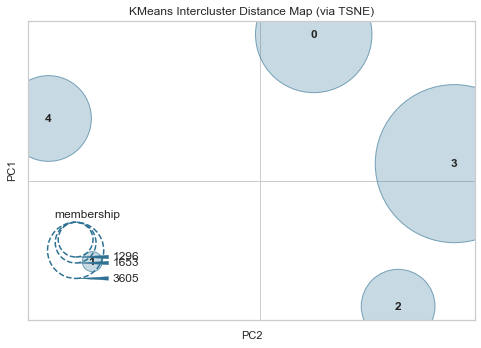

InterclusterDistance(ax=<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via TSNE)'}, xlabel='PC2', ylabel='PC1'>,
                     embedding='tsne',
                     estimator=KMeans(n_clusters=5, n_init=3,
                                      random_state=2345),
                     random_state=24)

In [25]:
#https://towardsdatascience.com/selecting-optimal-k-for-k-means-clustering-c7579fd2e926

from yellowbrick.cluster import intercluster_distance

intercluster_distance(KNNModel, pdata_z, embedding='tsne', random_state=24)

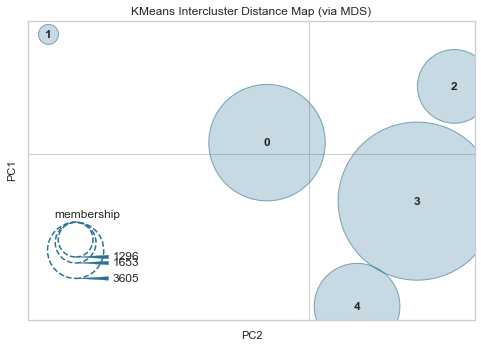

InterclusterDistance(ax=<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=KMeans(n_clusters=5, n_init=3,
                                      random_state=2345),
                     random_state=24)

In [26]:
intercluster_distance(KNNModel, pdata_z, embedding='mds', random_state=24)

The clusters 3,5,0 and 1 show a clear separation and a relationship between price and review score rating.  For example, if we compare cluster 0 in purple to cluster 5 in green, they are both around the same price range but are separated by their rating.

If you compare clusters 2 and 4, the main distinction would be the number of reviews, those with more reviews are separated from the rest, despite having a similar price and rating.
<br>
<br>
Cluster 0 (purple) - low price, high rating, low number of reviews
<br>
Cluster 1 (sky blue) - high price, high rating, low number of reviews
<br>
Cluster 2 (red) - medium-low price, high rating, low number of reviews
<br>
Cluster 3 (dark blue) - medium-high price, high rating, low number of reviews
<br>
Cluster 4 (yellow/orange) - medium price, high rating, high number of reviews
<br>
Cluster 5 (green) - low to medium-low price, lower rating, low number of reviews

In [27]:
Kmeans_results_analysis=round(pdata_list.groupby('KCLUSTER').mean(), ndigits=2)
Kmeans_results_analysis

number_of_reviews  review_scores_rating   price
KCLUSTER                                                 
0                     25.79                 94.93  226.99
1                     25.00                 94.83  537.66
2                     13.08                 77.28  101.99
3                     19.86                 96.15  104.17
4                    139.73                 94.26  114.30

In [31]:
import plotly.express as px
pdata["strKCLUSTER"] = pdata["KCLUSTER"].astype(str)
fig = px.scatter_3d(pdata, x='review_scores_rating', y='price', z='number_of_reviews', color='strKCLUSTER', title="Comparing Scaled Reviews, Price, and Accomodations colored by Groups")
fig.update_layout(width = 550, height = 550,margin=dict(l=0, r=0, b=0, t=0))
fig.show()
#The number of ratings and the average rating relating to the price of the listing.

In [33]:
fig05 = px.box(pdata_all, y="price", x="city", color="KCLUSTER", title ="Box Plot of the dataset with the accomodations by price and colored by groups", height=1000, width=1500)
fig05.update_layout(width = 900, height = 550,margin=dict(l=0, r=0, b=0, t=0))
fig05.show()


In [34]:
fig06 = px.box(pdata_all, y="review_scores_rating", x="city", color="KCLUSTER", title ="Box Plot of the dataset with the cities by scaled average rating and colored by groups", height=1000, width=1500)
fig06.update_layout(width = 900, height = 550,margin=dict(l=0, r=0, b=0, t=0))
fig06.show()

In [35]:
fig06 = px.box(pdata_all, y="number_of_reviews", x="city", color="KCLUSTER", title ="Box Plot of the dataset with the cities by number of reviews and colored by clusters", height=1000, width=1500)
fig06.update_layout(width = 900, height = 550,margin=dict(l=0, r=0, b=0, t=0))
fig06.show()

In [ ]:
#dataset=pdata[:]  #creating a copy of the data 
#dataset['KmeansLabel']=KNNModel.labels_

#### 3.2 Hierarchical Clustering Analysis

##### 3.2.1 Selecting Optimal Clusters

Selecting the optimal number of clusters in the hierarchical clusters is based on the height of the distance where one determines the best separation is represented.

##### 3.2.2 Validation Measures

We iterated through the various distance measuring techniques for the hierarchical clusters and compared the cophenetic scores, with a cophenetic index of 1 being the best option.

We evaluated the following linkage methods:
single, which is the minimum distance between clusters, complete - which is the maximum distance, average - the average of the distances between all pairs, ward - minimum within cluster variance , median - which is the median distance between clusters. 

##### 3.2.3 Models

In [36]:
# https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [37]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

linkage_methods = ['single', 'complete', 'average', 'ward', 'median']

results_cophenetic_coef=[]

for i in linkage_methods :
    Z = linkage(pdata_z, i)
    cc, coph_dists = cophenet(Z , pdist(pdata_z))
    results_cophenetic_coef.append((i,cc))

In [38]:
results_cophenetic_coef_df=pd.DataFrame(results_cophenetic_coef,columns=['LinkageMethod','CopheneticCoefficient'])
results_cophenetic_coef_df

LinkageMethod  CopheneticCoefficient
0        single               0.682061
1      complete               0.782919
2       average               0.868224
3          ward               0.477661
4        median               0.602575

We compared the cophenetic coefficient per linkage method above, we will now evaluate the clustering techniques visually in the dendograms below.

In [39]:
#hierarchical cluster with average linkage method
Z = linkage(pdata_z, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(pdata_z))

c

0.8682238953815257

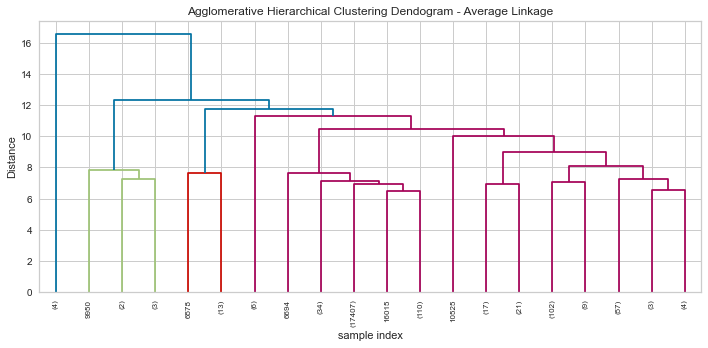

In [41]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram - Average Linkage')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8. , truncate_mode = 'lastp',p=20)
plt.tight_layout()

In [42]:
# hierarchical cluster with ward linkage method
Z1 = linkage(pdata_z, metric='euclidean', method='ward')
c1, coph_dists1 = cophenet(Z1 , pdist(pdata_z))

c1

0.4776610045765306

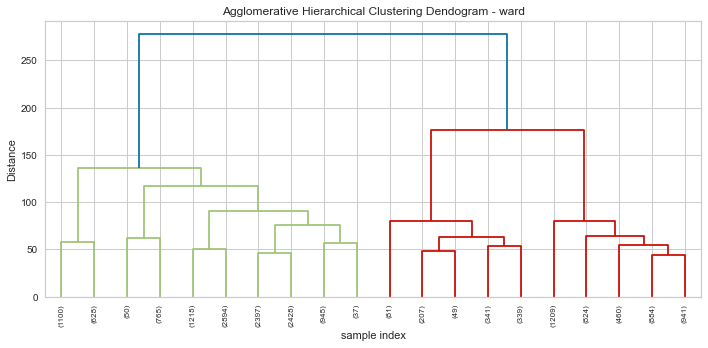

In [44]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram - ward')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z1, leaf_rotation=90., leaf_font_size=8. , truncate_mode = 'lastp',p=20)
plt.tight_layout()

We will now truncate the various hierarchical clusters to assign a cluster for visual representation

The distance range for the ward method is quite high compared to the average distance, we will truncate our clusters at distance = 150.  This will result in 5 clusters.

In [45]:
max_d=150
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z1, max_d, criterion='distance')
set(clusters)



{1, 2, 3}

In [47]:
pdata['HierarchicalCluster_Ward']=clusters
pdata_all['HierarchicalCluster_Ward']=clusters
pdata_cls['HierarchicalCluster_Ward']=clusters
pdata_list['HierarchicalCluster_Ward']=clusters
#dataset['HierarchicalCluster_Ward']=clusters

In [48]:
#the hierarchical label is now appended to our data 
pdata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17797 entries, 1 to 30735
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   log_price                 17797 non-null  float64
 1   accommodates              17797 non-null  int64  
 2   bathrooms                 17797 non-null  float64
 3   number_of_reviews         17797 non-null  int64  
 4   review_scores_rating      17797 non-null  float64
 5   bedrooms                  17797 non-null  float64
 6   beds                      17797 non-null  float64
 7   price                     17797 non-null  float64
 8   KCLUSTER                  17797 non-null  int32  
 9   strKCLUSTER               17797 non-null  object 
 10  HierarchicalCluster_Ward  17797 non-null  int32  
dtypes: float64(6), int32(2), int64(2), object(1)
memory usage: 2.0+ MB


In [49]:
import plotly.express as px
pdata["strHierarchicalCluster_Ward"] = pdata["HierarchicalCluster_Ward"].astype(str)
fig = px.scatter_3d(pdata, x='review_scores_rating', y='price', z='number_of_reviews', color='strHierarchicalCluster_Ward', title="Comparing Scaled Reviews, Price, and Accomodations colored by Groups")
fig.update_layout(width = 550, height = 550,margin=dict(l=0, r=0, b=0, t=0))
fig.show()
#The number of ratings and the average rating relating to the price of the listing.

In [50]:
#Assess the distribution of clusters formed using the ward linkage method
pdata['HierarchicalCluster_Ward'].value_counts()  

1    12462
3     4318
2     1017
Name: HierarchicalCluster_Ward, dtype: int64

In [51]:
hierarchical_results_analysis=round(pdata_list.groupby('HierarchicalCluster_Ward').mean(), ndigits=2)
hierarchical_results_analysis

number_of_reviews  review_scores_rating   price  \
HierarchicalCluster_Ward                                                    
1                                     34.37                 94.17  101.69   
2                                     21.35                 95.34  527.20   
3                                     27.51                 94.38  207.70   

                          KCLUSTER  
HierarchicalCluster_Ward            
1                             3.00  
2                             0.75  
3                             0.70

We will now evaluate the clusters when we apply the average linkage technique

In [52]:
max_d=11
from scipy.cluster.hierarchy import fcluster
clusters2 = fcluster(Z, max_d, criterion='distance')
set(clusters2)


{1, 2, 3, 4, 5}

In [53]:
pdata['HierarchicalCluster_Avg']=clusters2
pdata_all['HierarchicalCluster_Avg']=clusters2
pdata_cls['HierarchicalCluster_Avg']=clusters2
pdata_list['HierarchicalCluster_Avg']=clusters2

In [54]:
pdata['HierarchicalCluster_Avg'].value_counts()  

5    17767
3       14
2        6
4        6
1        4
Name: HierarchicalCluster_Avg, dtype: int64

In [55]:
import plotly.express as px
pdata["strHierarchicalCluster_Avg"] = pdata["HierarchicalCluster_Avg"].astype(str)
fig = px.scatter_3d(pdata, x='review_scores_rating', y='price', z='number_of_reviews', color='strHierarchicalCluster_Avg', title="Comparing Scaled Reviews, Price, and Accomodations colored by Groups")
fig.update_layout(width = 550, height = 550,margin=dict(l=0, r=0, b=0, t=0))
fig.show()
#The number of ratings and the average rating relating to the price of the listing.

In [86]:
hierarchical_results_analysis_avg=round(pdata_list.groupby('HierarchicalCluster_Avg').mean(), ndigits=2)
hierarchical_results_analysis_avg

number_of_reviews  review_scores_rating   price  \
HierarchicalCluster_Avg                                                    
1                                    23.50                 95.50  505.50   
2                                    32.67                 90.50  148.00   
3                                    30.21                 90.71   56.64   
4                                     1.67                 26.67  462.00   
5                                    31.98                 94.32  151.62   

                         KCLUSTER  HierarchicalCluster_Ward  DBSCAN_Cluster  
HierarchicalCluster_Avg                                                      
1                            1.00                      2.00           -1.00  
2                            0.50                      2.00           -1.00  
3                            1.00                      1.00           -1.00  
4                            1.83                      1.00           -1.00  
5                            2.31                      1.54           -0.04

##### 3.2.4 Observations

After visually comparing the hierarchical clustering methods and evaluating the cophanetic index, we deteremined which clustering linkage method was more appropriate for our data.  

The ward linkage method clusters the data among common properties, which makes sense because it is optimizing for the within cluster distance.  The average linkage method clustered a majority of the datapoints together, and highlighted the anomaly.  For example, the clusters that were outside of the main group, exhibited a rare combination of traits, like unusually small number of reviews or an extremely high price point.  We think average linkage is better for anomaly detection and ward linkage is more appropriate to find commonalities in the data.

#### 3.3 DBScan Clustering Analysis

We will now evaluate the DBScan clustering technique, we illustrated the eps points based on the min point value.

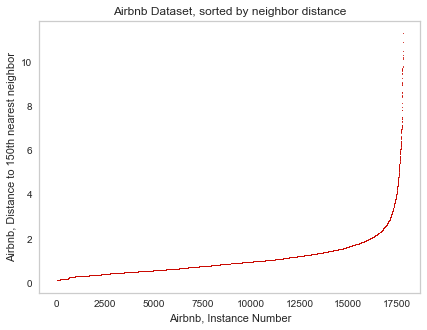

In [60]:
#from ICA 4 class example

from sklearn.neighbors import kneighbors_graph

db_minpts = 150

db_knn_graph = kneighbors_graph(pdata_z, db_minpts, mode = 'distance')

N2 = db_knn_graph.shape[0]
pdata_nn_distances = np.zeros((N2,1))
for i in range(N2):
    pdata_nn_distances[i] = db_knn_graph[i,:].max()
    
pdata_nn_distances = np.sort(pdata_nn_distances, axis=0)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(N2), pdata_nn_distances, 'r.', markersize=2)
plt.title('Airbnb Dataset, sorted by neighbor distance')
plt.xlabel('Airbnb, Instance Number')
plt.ylabel('Airbnb, Distance to {0}th nearest neighbor'.format(db_minpts))
plt.grid()
plt.show()


Based on the graph above, we have optimized the eps value and determined the best min points is 2 and the best eps is closest to 1

In [61]:
from sklearn.cluster import DBSCAN

modelDBSCAN = DBSCAN(eps=.75, min_samples=150).fit(pdata_z)
labelsDBSCAN = modelDBSCAN.labels_


In [62]:

pdata['DBSCAN_Cluster']=labelsDBSCAN
pdata_all['DBSCAN_Cluster']=labelsDBSCAN
pdata_cls['DBSCAN_Cluster']=labelsDBSCAN
pdata_list['DBSCAN_Cluster']=labelsDBSCAN

In [63]:
pdata['DBSCAN_Cluster'].value_counts()  

-1    7775
 0    7154
 3    1376
 2     906
 1     435
 4     151
Name: DBSCAN_Cluster, dtype: int64

In [64]:
import plotly.express as px
pdata["strDBSCAN_Cluster"] = pdata["DBSCAN_Cluster"].astype(str)
fig = px.scatter_3d(pdata, x='accommodates', y='bedrooms', z='price', color='strDBSCAN_Cluster', title="Comparing Scaled Reviews, Price, and Accomodations colored by Groups")
fig.update_layout(width = 550, height = 550,margin=dict(l=0, r=0, b=0, t=0))
fig.show()
#The number of ratings and the average rating relating to the price of the listing.

In [65]:
dbscan_results_analysis_avg=round(pdata_list.groupby('DBSCAN_Cluster').mean(), ndigits=2)
dbscan_results_analysis_avg

number_of_reviews  review_scores_rating   price  KCLUSTER  \
DBSCAN_Cluster                                                              
-1                          43.54                 92.32  207.16      1.60   
 0                          24.70                 95.54   99.67      3.01   
 1                          14.03                 97.61  171.52      0.51   
 2                          18.28                 96.45  123.22      3.00   
 3                          21.26                 96.01  130.49      2.75   
 4                          11.38                 98.15   71.62      3.00   

                HierarchicalCluster_Ward  HierarchicalCluster_Avg  
DBSCAN_Cluster                                                     
-1                                  2.04                     4.99  
 0                                  1.06                     5.00  
 1                                  3.00                     5.00  
 2                                  1.00                     5.00  
 3                                  1.17                     5.00  
 4                                  1.00                     5.00

##### 3.3.1 Selecting Optimal Clusters

Evaluating the DBScan, we used a kneighbors graph to determine the optimal eps and min_points required.  Once we produced the ideal number of points, we visually evaluated the separation as identified by the DBSCAN clusters.  There appeared to be a distinct separation based on the number of room and how many people it accommodated.  This technique used a different set of properties to differentiate the data.

##### 3.3.2 Validation Measures

##### 3.3.3 Results

In [ ]:
pdata.head()

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html


In [66]:
modelDBSCAN = DBSCAN(eps=.75, min_samples=150).fit(pdata_z)
labelsDBSCAN = modelDBSCAN.labels_

In [67]:
# referenced from class example

core_samples_mask = np.zeros_like(modelDBSCAN.labels_, dtype=bool)
core_samples_mask[modelDBSCAN.core_sample_indices_] = True
labels = modelDBSCAN.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(pdata_z, labels))


Estimated number of clusters: 5
Estimated number of noise points: 7775
Silhouette Coefficient: -0.132


In [68]:
# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = pdata_z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = pdata_z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

##### 2.3.2 K-Nearest Neighbors Classification

In [ ]:
get_ipython().run_line_magic('time', '')
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline


#pipe = make_pipeline(('scale', StandardScaler()),  ('knn', KNeighborsClassifier()))

pipe = Pipeline([('scale', StandardScaler()),  
                         ('knn', KNeighborsClassifier())]) 

# Define a range of hyper parameters for grid search
parameters = { 'knn__n_neighbors': [10,45,50]
              , 'knn__algorithm' : ["auto", "ball_tree", "kd_tree", "brute"]
             }

#Perform the grid search using accuracy as a metric during cross validation.
gridKnn = GridSearchCV(pipe, parameters, cv=cv, scoring='accuracy') # can try f1_micro, f1_maco accuracy....

#Use the best features from recursive feature elimination during the grid search
gridKnn.fit(X_train_scaled_cls, y_train_cls)

#display the best pipeline model identified during the grid search
gridKnn.best_estimator_

In [ ]:
gridKnn.best_params_

In [ ]:
KNNmodelFINAL = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 45) # get object
KNNmodelFINAL.fit(X_train_scaled_cls, y_train_cls)
KNNy_hat = KNNmodelFINAL.predict(X_test_scaled_cls)

In [ ]:
from sklearn.model_selection import cross_val_score
KNNaccuracies = cross_val_score(KNNmodelFINAL, X_scaled_cls, y=y_cls, cv=cv) # this also can help with parallelism
print(KNNaccuracies)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

print("Training accuracy",round(KNNmodelFINAL.score(X_train_scaled_cls,y_train_cls),ndigits=3))
print()
print("Testing accuracy",round(mt.accuracy_score(y_test_cls, KNNy_hat),ndigits=3))
print()
print('Confusion Matrix')
print(draw_cm(y_test_cls,KNNy_hat))

print(classification_report(y_test_cls,KNNy_hat))

In [ ]:
KNN_ac = round(mt.accuracy_score(y_test_cls, KNNy_hat),ndigits=3)

print(KNN_ac)

In [ ]:
Kmeans_results.plot.bar()

In [ ]:
pdata_all.info()

#### 3.4 Comparison of all Clustering Techniques

In [ ]:
seuclid = []
scosine = []
k = range(2,10)
for i in k:
    kmeans_model = KMeans(n_clusters=i, init="k-means++", random_state=2345).fit(pdata_z)
    labels = kmeans_model.labels_
    seuclid.append(metrics.silhouette_score(pdata_z, labels, metric='euclidean'))
    scosine.append(metrics.silhouette_score(pdata_z, labels, metric='cosine'))
  

        
plt.figure(figsize=(10,5))
plt.plot(k,seuclid,label='euclidean')
plt.plot(k,scosine,label='cosine')
plt.ylabel("Silhouette")
plt.xlabel("Cluster")
plt.title("Silhouette vs Cluster Size")
plt.legend()
plt.show()

In [98]:
slist = []
slist.append(metrics.silhouette_score(pdata_z, KNNModel.labels_, metric='euclidean'))
slist.append(metrics.silhouette_score(pdata_z, modelDBSCAN.labels_))
slist.append(metrics.silhouette_score(pdata_z, clusters))


df = pd.DataFrame(data=slist)


In [95]:
df.head().transpose()

0         1         2
0  0.307648 -0.131861  0.278042

TypeError: '(slice(None, None, None), 0)' is an invalid key

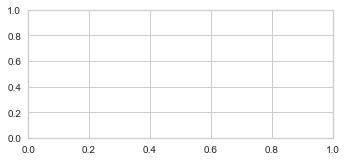

In [110]:
from sklearn.cluster import AgglomerativeClustering
#Comparison of the Clustering
data = pdata_z

cls = DBSCAN(eps=0.99, min_samples=2)
cls.fit(data)
dbs_labels = cls.labels_ 

cls = AgglomerativeClustering(n_clusters=6, linkage='complete')
cls.fit(data)
hac_labels = cls.labels_ 

cls = KMeans(n_clusters=6, random_state=12)
cls.fit(data)
kmn_labels = cls.labels_

fig = plt.figure(figsize=(12,8))
title = ['DBSCAN','HAC','KMEANS']

for i,l in enumerate([dbs_labels,hac_labels,kmn_labels]):
    
    plt.subplot(3,2,2*i+1)
    plt.scatter(data[:, 0], data[:, 1]+np.random.random(data[:, 1].shape)/2, c=l, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('Age (normalized)'), plt.ylabel('Parch')
    plt.grid()
    plt.title(title[i])
    
    plt.subplot(3,2,2*i+2)
    plt.scatter(data[:, 0], data[:, 2]+np.random.random(data[:, 1].shape)/2, c=l, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('Age (normalized)'), plt.ylabel('SibSp')
    plt.grid()
    plt.title(title[i])
    
    


plt.tight_layout()
plt.show()

In [111]:
data = pdata_z

cls = DBSCAN(eps=0.99, min_samples=2)
cls.fit(data)
dbs_labels = cls.labels_ 

cls = AgglomerativeClustering(n_clusters=6, linkage='complete')
cls.fit(data)
hac_labels = cls.labels_ 

cls = KMeans(n_clusters=6, random_state=12)
cls.fit(data)
kmn_labels = cls.labels_


In [113]:
data.head()

log_price  accommodates  bathrooms  number_of_reviews  \
1   0.532142      1.654262  -0.409032          -0.577731   
2   0.304644      0.756496  -0.409032          -0.488726   
4  -0.039654     -0.590154  -0.409032          -0.622234   
5  -0.488636     -0.590154  -0.409032          -0.644485   
7   0.023561     -0.590154  -0.409032          -0.510977   

   review_scores_rating  bedrooms      beds     price  
1             -0.182671  1.997563  0.917106  0.123608  
2             -0.324357 -0.320024  0.917106 -0.048163  
4             -7.692046 -1.478818 -0.599854 -0.262876  
5              0.809133 -0.320024 -0.599854 -0.477589  
7             -0.182671 -0.320024 -0.599854 -0.227090

TypeError: '(slice(None, None, None), 0)' is an invalid key

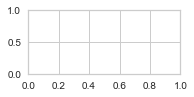

In [112]:
for i,l in enumerate([dbs_labels,hac_labels,kmn_labels]):
    
    plt.subplot(3,2,2*i+1)
    plt.scatter(data[:, 0], data[:, 1]+np.random.random(data[:, 1].shape)/2, c=l, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('Age (normalized)'), plt.ylabel('Parch')
    plt.grid()
    plt.title(title[i])


### 4. Deployment

How will our chosen model be usable by other parties?
-      Our model does well to visualize how multiple features of an Airbnb rental affect each other. An Airbnb owner may be interested in using the results to set goals for some of the features. Such as aiming for higher number of reviews, and higher review scores to justify a price point of their property.
Did we achieve our goals?
-      Our goal was to provide insight into how different Airbnb features interacted with each other. We were able to group our data based off multiple parameters and analyze how these groups could be used to create better business understanding.
Can we reign in the utility of our modeling?
How useful is our model for interested parties?
-      Our model may not be useful for forecasting Airbnb data; however, it would be very useful to group Airbnb features together and make decisions based off the data found in the clusters.
How would we deploy our model for interested parties?
-      Our model could be deployed to Airbnb corporation to include as a feature for current property owners using their platform.
What other data should be collected?
-      Having some more physical features of the property could be beneficial. Things like square footage, year built, and number of floors could be features that can aid in clustering properties together and lead to better business understanding and decision making.
How often would the model need to be updated?
-      Our model would benefit from the most up to date information. Updating data at a minimum of every year would require our models to be refit each time as property values may sift.

### 5. Exceptional Work